##  EXPLORATORY DATA ANALYSIS

In [1]:
#importing the necessary libraries
import pandas as pd
import numpy as np
import os
import sys
import nltk
import re
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
nltk.download('stopwords', quiet=True)
nltk.download('wordnet', quiet=True)
nltk.download('punkt', quiet=True)
nltk.download('punkt_tab', quiet=True)



True

In [2]:
!LS

Cleaning.ipynb
EDA.ipynb
README.md
Safaricom tweets.csv
notebook.ipynb
saf_tweets_cleaned.csv


In [3]:
#Loading the Safaricom tweets dataset
Saf_tweets=pd.read_csv('Safaricom tweets.csv')
#Displaying the first few rows of the dataset
Saf_tweets.head()

,Tweet ID,URL,Content,Likes,Retweets,Replies,Quotes,Views,Date,Labels
0,1.950000e+18,https://x.com/MawiaDorothy/status/194955836816...,How comes I have overdue debts.. na sijakopa.....,1,0,0,0,21,"July 27, 2025 at 07:51 PM",Customer care complaint
1,1.950000e+18,https://x.com/KruiGeofrey/status/1949310365839...,@Monty_Hasashi @Safaricom 😂😂,0,0,0,0,22,"July 27, 2025 at 03:26 AM",Neutral
2,1.950000e+18,https://x.com/martozgicha/status/1949022872242...,"@safaricom weka data ,wacheni jokes...Thank yo...",0,0,0,0,6,"July 26, 2025 at 08:23 AM",Internet or airtime bundle complaint
3,1.950000e+18,https://x.com/liyansmutembei/status/1948476756...,@SafaricomPLC Hello @SafaricomPLC @safaricom...,0,0,0,0,47,"July 24, 2025 at 08:13 PM",Customer care complaint
4,1.950000e+18,https://x.com/SsirNixoNdugire/status/194833516...,@PeterNdegwa_ @SafaricomPLC @Safaricom_Care @S...,0,0,0,0,5,"July 24, 2025 at 10:51 AM",Customer care complaint


In [4]:
#checking info
Saf_tweets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2574 entries, 0 to 2573
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Tweet ID  2574 non-null   float64
 1   URL       2574 non-null   object 
 2   Content   2574 non-null   object 
 3   Likes     2574 non-null   int64  
 4   Retweets  2574 non-null   int64  
 5   Replies   2574 non-null   int64  
 6   Quotes    2574 non-null   int64  
 7   Views     2574 non-null   int64  
 8   Date      2574 non-null   object 
 9   Labels    2573 non-null   object 
dtypes: float64(1), int64(5), object(4)
memory usage: 201.2+ KB


In [5]:
#check for missing values in each column
Saf_tweets.isnull().sum()

Tweet ID    0
URL         0
Content     0
Likes       0
Retweets    0
Replies     0
Quotes      0
Views       0
Date        0
Labels      1
dtype: int64

In [6]:
#drop missing values
Saf_tweets.dropna(inplace=True)
Saf_tweets.isnull().sum()

Tweet ID    0
URL         0
Content     0
Likes       0
Retweets    0
Replies     0
Quotes      0
Views       0
Date        0
Labels      0
dtype: int64

In [7]:
#Check for duplicated values
Saf_tweets.duplicated().sum()

0

In [8]:
#Get summary statistics for numerical columns
Saf_tweets.describe()

,Tweet ID,Likes,Retweets,Replies,Quotes,Views
count,2.573000e+03,2573.000000,2573.000000,2573.000000,2573.000000,2573.000000
mean,1.800307e+18,2.220365,0.817723,0.367664,0.029538,215.534784
std,8.051897e+16,50.314308,24.729214,2.476969,0.390276,1533.267592
min,1.640000e+18,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.730000e+18,0.000000,0.000000,0.000000,0.000000,19.000000
50%,1.810000e+18,0.000000,0.000000,0.000000,0.000000,40.000000
75%,1.850000e+18,1.000000,0.000000,0.000000,0.000000,99.000000
max,1.950000e+18,2528.000000,1244.000000,114.000000,16.000000,64438.000000


In [9]:
#Get summary statistics for object columns
Saf_tweets.describe(include='object')

,URL,Content,Date,Labels
count,2573,2573,2573,2573
unique,2573,2522,2486,7
top,https://x.com/kariukimk/status/180587387703521...,@safaricom,"September 27, 2024 at 05:40 AM",Neutral
freq,1,15,7,1032


In [10]:
#check number of unique values per column
Saf_tweets.nunique()

Tweet ID      32
URL         2573
Content     2522
Likes         40
Retweets      21
Replies       16
Quotes         6
Views        469
Date        2486
Labels         7
dtype: int64

In [11]:
#Check unique counts in labels
Saf_tweets['Labels'].value_counts()

Neutral                                 1032
Customer care complaint                  397
Internet or airtime bundle complaint     299
Hate Speech                              297
MPESA complaint                          189
Network reliability problem              184
Data protection and privacy concern      175
Name: Labels, dtype: int64

In [12]:
#visualize the label distribution
import plotly.express as px
fig = px.bar(
    Saf_tweets['Labels'].value_counts().reset_index(),
    x='index',
    y='Labels',
    labels={'index': 'Labels', 'Labels': 'Count'},
    title='Label Distribution'
)
fig.show()

In [13]:
def generate_columns(Saf_tweets):
    Saf_tweets['chars'] = Saf_tweets['Content'].apply(len)
    Saf_tweets['words'] = Saf_tweets['Content'].apply(lambda x: len(nltk.word_tokenize(x)))
    Saf_tweets['sentences'] = Saf_tweets['Content'].apply(lambda x: len(nltk.sent_tokenize(x)))
    return Saf_tweets

# apply to dataframe
Saf_tweets = generate_columns(Saf_tweets)

# show first 10 rows
Saf_tweets.head()



,Tweet ID,URL,Content,Likes,Retweets,Replies,Quotes,Views,Date,Labels,chars,words,sentences
0,1.950000e+18,https://x.com/MawiaDorothy/status/194955836816...,How comes I have overdue debts.. na sijakopa.....,1,0,0,0,21,"July 27, 2025 at 07:51 PM",Customer care complaint,99,19,1
1,1.950000e+18,https://x.com/KruiGeofrey/status/1949310365839...,@Monty_Hasashi @Safaricom 😂😂,0,0,0,0,22,"July 27, 2025 at 03:26 AM",Neutral,28,5,1
2,1.950000e+18,https://x.com/martozgicha/status/1949022872242...,"@safaricom weka data ,wacheni jokes...Thank yo...",0,0,0,0,6,"July 26, 2025 at 08:23 AM",Internet or airtime bundle complaint,181,38,2
3,1.950000e+18,https://x.com/liyansmutembei/status/1948476756...,@SafaricomPLC Hello @SafaricomPLC @safaricom...,0,0,0,0,47,"July 24, 2025 at 08:13 PM",Customer care complaint,280,53,4
4,1.950000e+18,https://x.com/SsirNixoNdugire/status/194833516...,@PeterNdegwa_ @SafaricomPLC @Safaricom_Care @S...,0,0,0,0,5,"July 24, 2025 at 10:51 AM",Customer care complaint,255,48,2


In [14]:
Saf_tweets['tweet_length'] = Saf_tweets['Content'].apply(len)
fig = px.histogram(
    Saf_tweets,
    x='tweet_length',
    nbins=30,
    title='Distribution of Tweet Lengths (in characters)'
)
fig.show()

In [15]:
Saf_tweets['Date'] = pd.to_datetime(Saf_tweets['Date'], errors='coerce')

In [16]:
Saf_tweets['day_of_week'] = Saf_tweets['Date'].dt.day_name()
Saf_tweets['hour'] = Saf_tweets['Date'].dt.hour



In [17]:
import plotly.express as px

fig = px.bar(
    Saf_tweets['day_of_week'].value_counts().reset_index().sort_values('index'),
    x='index',
    y='day_of_week',
    labels={'index': 'Day of Week', 'day_of_week': 'Tweet Count'},
    title='Number of Tweets per Day of Week'
)
fig.show()

In [18]:
Saf_tweets['day_of_week'].value_counts()

Wednesday    530
Tuesday      464
Thursday     373
Friday       351
Monday       305
Saturday     304
Sunday       246
Name: day_of_week, dtype: int64

In [19]:
import plotly.express as px

# Count tweets per hour
hourly_counts = Saf_tweets['hour'].value_counts().sort_index()

# Create a bar plot with Plotly
fig = px.bar(
    x=hourly_counts.index,
    y=hourly_counts.values,
    labels={'x': 'Hour of Day (0-23)', 'y': 'Number of Tweets'},
    title='Tweet Volume by Hour of Day'
)
fig.update_layout(
    xaxis=dict(tickmode='linear', dtick=1)
)
fig.show()

### Checking the tweets with the most engagement in terms of likes,retweets and replies

In [20]:
Saf_tweets['engagement_score'] = Saf_tweets['Likes'] + Saf_tweets['Retweets'] + Saf_tweets['Replies'] + Saf_tweets['Quotes']

In [21]:
#sorting tweets by engagement
pd.set_option('display.max_colwidth', None)  # Show full content in 'Content' column

# Now display the top tweets by engagement
Saf_tweets.sort_values(by='engagement_score', ascending=False).head(10)


,Tweet ID,URL,Content,Likes,Retweets,Replies,Quotes,Views,Date,Labels,chars,words,sentences,tweet_length,day_of_week,hour,engagement_score
1354,1.810000e+18,https://x.com/ItsChanzu/status/1805919354774548806,"After @safaricom's betrayal, I have no choice but to relegate it to SIM 2 cause it is public enemy #1. https://t.co/k61yTUBlXh",2528,1244,12,16,64438,2024-06-26 11:01:00,Hate Speech,126,27,1,126,Wednesday,11,3800
105,1.930000e+18,https://x.com/wmnjoya/status/1934967792094138576,"And those payments were facilitated by telcos, accountants and bankers. So @Safaricom, @ICPAK @KenyaBankers need to tell the public how this money is being disbursed.",173,130,0,0,5098,2025-06-17 13:34:00,Customer care complaint,166,32,2,166,Tuesday,13,303
1604,1.800000e+18,https://x.com/ItsAnyangu/status/1799356584457605423,@kenyasgossips This one by @safaricom was epic too https://t.co/ooTZg7vEdp,177,25,14,2,7830,2024-06-08 08:23:00,Neutral,74,13,1,74,Saturday,8,218
2323,1.680000e+18,https://x.com/Wcbwasafi_/status/1675957293865660417,"If You're @Safaricom user Entertain your callers, SMS the WORD 'SKIZA' followed by 7302969 to 811 @iamlavalava TAJIRI https://t.co/De8wrWHef3",135,2,1,0,2786,2023-07-03 19:58:00,Neutral,141,26,1,141,Monday,19,138
1176,1.820000e+18,https://x.com/aniniwafula/status/1816009150846919094,thank you @safaricom for listening to me. only 2 hosts zimebaki and still working. kindly mshughulikie wasee wabuy data tena.\nfreenet is not an option,11,2,114,6,6353,2024-07-24 07:14:00,Internet or airtime bundle complaint,150,29,4,150,Wednesday,7,133
187,1.920000e+18,https://x.com/Bastacecy/status/1922541605107519845,@BravinYuri The problem is not @safaricom. The problem is with you. There are alternative but you insist on those thieves. Endeleeni kuibiwa kabisa.,86,5,1,0,2932,2025-05-14 06:36:00,Hate Speech,148,29,4,148,Wednesday,6,92
2102,1.710000e+18,https://x.com/landoo254/status/1710264571565416606,@safaricom after scrapping off a data deal when they realize it's your favourite🥱 https://t.co/hd3XQKY9Zy,50,26,12,0,2070,2023-10-06 12:03:00,Internet or airtime bundle complaint,105,18,1,105,Friday,12,88
866,1.830000e+18,https://x.com/DictatorWatch/status/1831605663127998507,@evenmaina Employees of @Safaricom are partners of the scammers. That teleco is one huge scene of crimes against humanity!,75,5,0,0,2978,2024-09-05 08:09:00,Data protection and privacy concern,122,23,2,122,Thursday,8,80
2277,1.690000e+18,https://x.com/TheAbojani/status/1685271977810866176,WEEKLY HIGHLIGHTS\n\n1⃣ @safaricom held its AGM yesterday where shareholders approved the establishment of Two New Subsidiaries to Empower and Invest in Tech Start-ups in Kenya The company also announced KES 48.08 Billion total dividend payout for the year.\n\n@MihrThakar @coldtusker @alykhansatchu\n@SokoAnalyst @omwambaKE @Theo_mwangi\n@khusoko @SpaceYaMagari @tradingroomke,58,19,3,0,24161,2023-07-29 12:52:00,Neutral,372,59,2,372,Saturday,12,80
778,1.840000e+18,https://x.com/CalvinBrooks87/status/1840623166512857472,"3/3\nSafaricom's presence in #Tigray could boost connectivity, but with just 12 local hires for 16 cities, it falls short. We encourage @Safaricom to reconsider its hiring strategy or reconsider its operations in the region. #LocalJobs #SafaricomTigray #Tigray @SafaricomPLC @Safaricom_Care @SafaricomET @SafaricomSacco @hrw @USDOL @SafaricomFDN [https://t.co/XyVcQccD1L]",20,57,0,0,386,2024-09-30 05:22:00,Neutral,371,67,3,371,Monday,5,77


### Checking distribution of tweets by year

In [22]:
#extracting year from the date column
Saf_tweets['year'] = Saf_tweets['Date'].dt.year

In [23]:
#grouping by year and counting tweets
year_label_counts = Saf_tweets.groupby(['year', 'Labels']).size().reset_index(name='count')

In [24]:
import plotly.express as px

fig = px.bar(
    year_label_counts,
    x='year',
    y='count',
    color='Labels',
    barmode='group',
    labels={'year': 'Year', 'count': 'Number of Tweets', 'Labels': 'Label'},
    title='Number of Tweets per Label by Year'
)
fig.show()

### Checking most common words in tweet comments per each label visually

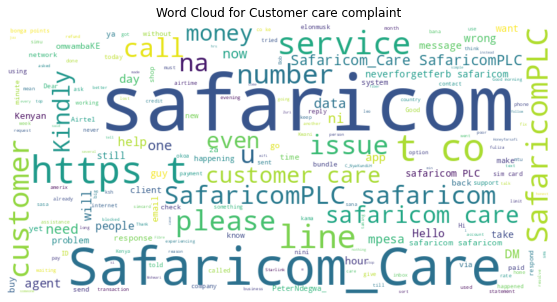

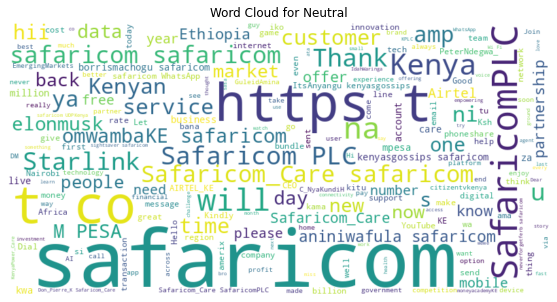

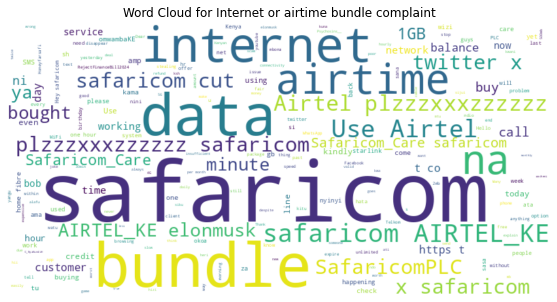

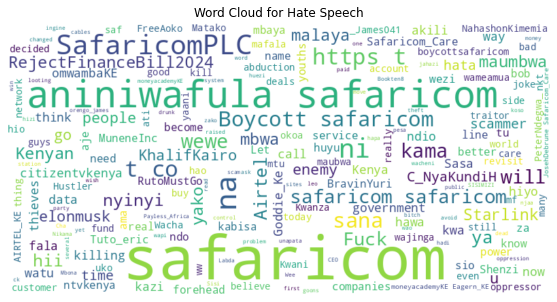

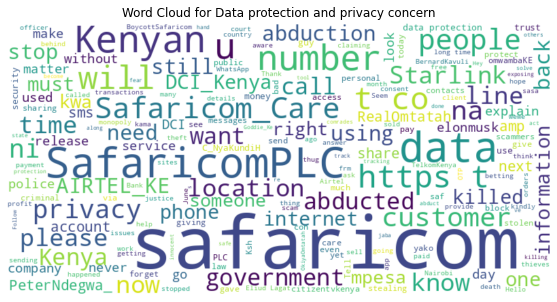

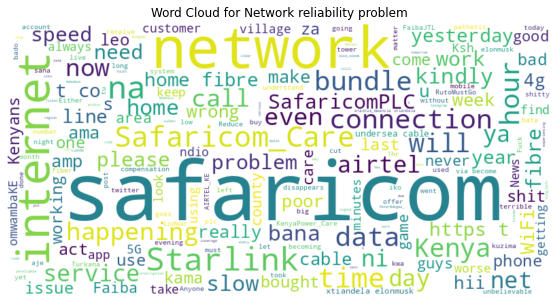

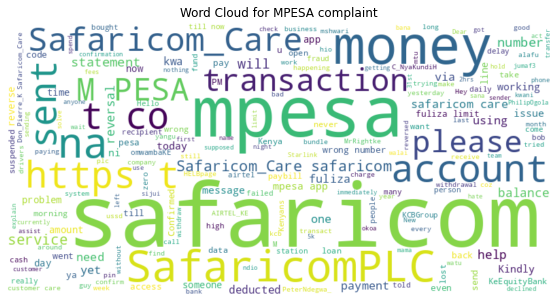

In [25]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

for label in Saf_tweets['Labels'].unique():
    text = " ".join(Saf_tweets[Saf_tweets['Labels'] == label]['Content'])
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f'Word Cloud for {label}')
    plt.show()

### checking for correlation between numerical columns

In [32]:
import plotly.graph_objects as go

numeric_cols = ['Likes', 'Retweets', 'Replies', 'Quotes', 'engagement_score']
corr_matrix = Saf_tweets[numeric_cols].corr()

fig = go.Figure(
    data=go.Heatmap(
        z=corr_matrix.values,
        x=corr_matrix.columns,
        y=corr_matrix.index,
        colorscale='viridis',
        zmin=-1, zmax=1,
        colorbar=dict(title='Correlation')
    )
)
fig.update_layout(
    title='Correlation Heatmap',
    xaxis_nticks=len(numeric_cols),
    yaxis_nticks=len(numeric_cols)
)

Checking for monthly tweet volume

In [28]:
monthly_counts['month'] = monthly_counts['month'].astype(str)


In [29]:
import plotly.express as px
fig = px.line(monthly_counts, x='month', y='count', title='Monthly Tweet Volume')
fig.show()

In [31]:
fig = px.pie(Saf_tweets, names='Labels', title='Label Proportion')
fig.show()